14_3 Explicit Euler integration of the Lotka–Volterra model

400


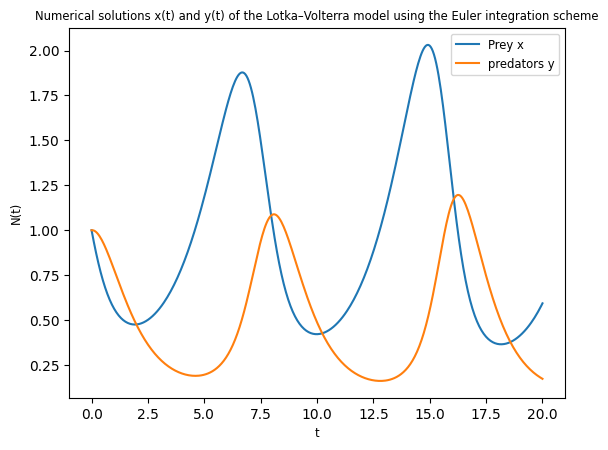

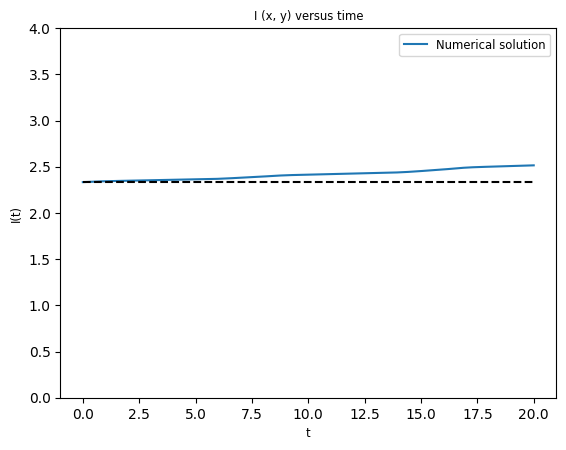

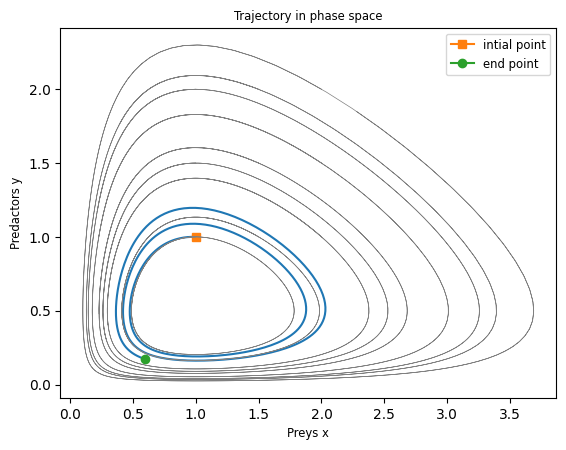

In [60]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

alpha =2/3
beta = 4/3
gamma = 1
kronicha_delta = 1
x0=1
y0=1
dt=0.05
total_t = int(20/dt)


def calcualte_invariant(x,y):
    return kronicha_delta*x - gamma*np.log(x)+ beta*y - alpha*np.log(y)
print(total_t)

def model(y, t):
    x, y = y
    dxdt = alpha*x - beta*x*y
    dydt = -gamma*y + kronicha_delta*x*y
    return [dxdt, dydt]

x= np.zeros((total_t,1))
y= np.zeros((total_t,1))
x[0]=x0
y[0]=y0
invarient =np.zeros((total_t,1))
invarient[0]= calcualte_invariant(x[0],y[0])
t_list= np.linspace(0,20, total_t)

for i in range(1,total_t):
    x[i]=x[i-1] + (alpha*x[i-1]-beta*x[i-1]*y[i-1])*dt
    y[i]= y[i-1]+ (kronicha_delta*x[i-1]*y[i-1]-gamma*y[i-1])*dt
    invarient[i]= calcualte_invariant(x[i],y[i])

x_initials = np.linspace(1, 2, 3)  
y_initials = np.linspace(1, 2, 3)

plt.plot(t_list,x, label='Prey x')
plt.plot(t_list,y, label='predators y')
plt.legend(fontsize ='small')
plt.xlabel('t',fontsize ='small')
plt.ylabel('N(t)',fontsize ='small')
plt.title('Numerical solutions x(t) and y(t) of the Lotka–Volterra model using the Euler integration scheme',fontsize ='small')
plt.xticks(fontsize='10')
plt.yticks(fontsize='10')
plt.show()

matrix = np.full((total_t,1), [invarient[0]])

plt.plot(t_list, invarient, label = 'Numerical solution' )
plt.plot(t_list,matrix, linestyle ='dashed', color='black')
plt.xlabel('t',fontsize ='small')
plt.ylabel('I(t)',fontsize ='small')
plt.title('I (x, y) versus time',fontsize ='small')
plt.ylim(0,4)
plt.legend(fontsize ='small')
plt.xticks(fontsize='10')
plt.yticks(fontsize='10')
plt.show()

plt.plot(x,y)
plt.plot(x[0],y[0], marker ='s', label ='intial point')
plt.plot(x[-1],y[-1], marker ='o', label ='end point')

plt.xlabel('Preys x', fontsize ='small')
plt.ylabel('Predactors y', fontsize ='small')
for x0 in x_initials:
    for y0 in y_initials:
        initial_conditions = [x0, y0]
        solution = odeint(model, initial_conditions, t_list)
        plt.plot(solution[:, 0], solution[:, 1], color = 'gray', linewidth=0.5)
plt.title('Trajectory in phase space',fontsize ='small')
plt.legend(fontsize='small')
plt.xticks(fontsize='10')
plt.yticks(fontsize='10')

plt.show()
